## Geodata를 활용한 그룹핑 분석



DB : PostgreSQL v16.3

### DB 접속, CSV 파일 정보를 DB에 업력

In [ ]:
import pandas as pd
import psycopg2
from psycopg2 import sql

#CSV 파일 경로
csvFilePath = 'csv/schoolGpsdata240322.csv'

#DB 연결
db = psycopg2.connect(host='localhost', dbname='geodata', user='postgres', password='3844', port=5432)
db.set_client_encoding('UTF-8')
cur = db.cursor()
tableName = 'schools'

#CSV 처리
df = pd.read_csv(csvFilePath, encoding='CP949')

# 데이터프레임의 열 이름을 가져오기
columns = df.columns.tolist()

# 데이터 삽입을 위한 SQL 쿼리 생성
insert_query = sql.SQL('''INSERT INTO {table} ({fields}) VALUES ({values})''').format(
    table=sql.Identifier(tableName),
    fields=sql.SQL(', ').join(map(sql.Identifier, columns)),
    values=sql.SQL(', ').join(sql.Placeholder() * len(columns))
)

# 데이터프레임의 각 행을 데이터베이스에 삽입
for _, row in df.iterrows():
    cur.execute(insert_query, row.tolist())

# 변경 사항 커밋
db.commit()

# 연결 종료
cur.close()
db.close()
print("Data inserted successfully.")


              sID        schoolname level eType                   address  \
0      B000011355  단국대학교부속소프트웨어고등학교  고등학교    사립       서울특별시 강남구 도곡로64길 21   
1      B000008405            남서울중학교   중학교    공립    서울특별시 관악구 남부순환로172길 97   
2      B000008365             봉은중학교   중학교    공립     서울특별시 강남구 영동대로128길 59   
3      B000003396          대전대화초등학교  초등학교    공립      대전광역시 대덕구 대화로 242-36   
4      B000023141            도담고등학교  고등학교    공립          세종특별자치시  보듬4로 41   
...           ...               ...   ...   ...                       ...   
11987  B000004388            나래초등학교  초등학교    공립  경기도 이천시 장호원읍 이풍로63번길 114   
11988  B000024367            주촌초등학교  초등학교    공립   경상남도 김해시 주촌면 천곡로15번길 13   
11989  B000030579            포담초등학교  초등학교    공립       경기도 포천시 영중면 양문로 163   
11990  B000030309            다율초등학교  초등학교    공립            경기도 파주시 다율로 30   
11991  B000005670            탕정초등학교  초등학교    공립     충청남도 아산시 탕정면 탕정면로 105   

             city          region       lati       longi  
0        서울특별시교육

<Axes: xlabel='longi', ylabel='lati'>

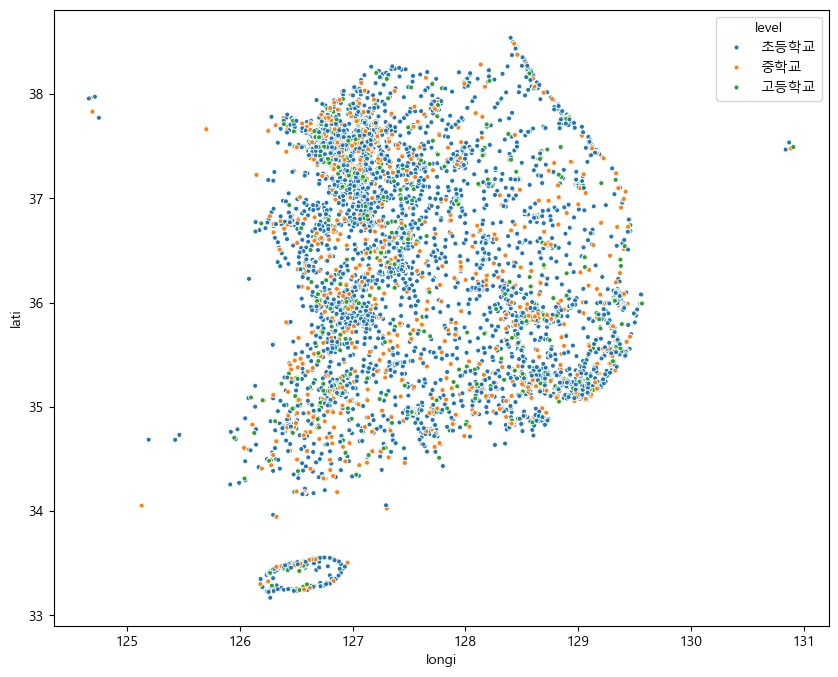

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
import numpy as np

#플롯에 한글 표기
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#CSV 파일 경로
csvFilePath = 'csv/schoolGpsdata240322.csv'

#DB 연결
db = psycopg2.connect(host='localhost', dbname='geodata', user='postgres', password='3844', port=5432)
db.set_client_encoding('UTF-8')
cur = db.cursor()
tableName = 'schools'

#CSV 처리
df = pd.read_csv(csvFilePath, encoding='CP949')
df2 = df.astype({'longi':float, 'lati':float})
print(df2)

#그래프 그리기
plt.figure(figsize=(10,8))
sns.scatterplot(data = df2, x="longi", y="lati",
                hue='level',
                hue_order = ['초등학교', '중학교', '고등학교'],
                s=50,
                marker='.')


